In [4]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
# Construct the filename
filename = "asset.csv"
data = pd.read_csv(filename)

asset_list = data["Asset"].unique()
# get random 4 assets_list in asset_list
np.random.seed(0)
np.random.shuffle(asset_list)
asset_list = asset_list

exp_ret = {}
return_list = []
for asset in asset_list:
    open_price = np.array(data[data["Asset"] == asset]["Open"].astype("float"))
    close_price = np.array(data[data["Asset"] == asset]["Close"].astype("float"))
        
    # Sign will be used to indicate the value gradient direction
    returns = ((close_price - open_price)/open_price)
    exp_ret[asset] = returns.mean()
    return_list.append(returns)

# Expected return on each asset
return_list = np.array(return_list)
mu = [i for i in exp_ret.values()]   
sigma = np.cov((return_list))


In [6]:
(asset_list.shape[0])

97

In [13]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
# Construct the filename
filename = "asset.csv"
data = pd.read_csv(filename)

# Unique asset list
asset_list = data["Asset"].unique()
#expected return
exp_ret = {}
return_list = []
for asset in asset_list:
    open_price = np.array(data[data["Asset"] == asset]["Open"].astype("float"))
    close_price = np.array(data[data["Asset"] == asset]["Close"].astype("float"))
        
    # Sign will be used to indicate the value gradient direction
    returns = ((close_price - open_price)/open_price)
    exp_ret[asset] = returns.mean()
    return_list.append(returns)

# Expected return on each asset
return_list = np.array(return_list)
mu = [i for i in exp_ret.values()]   
    
# Compute covariance between returns
sigma = np.cov((return_list))
filter = data.groupby("Asset").agg({"Open time":max}).reset_index()
costs = data.merge(filter, how='inner').drop_duplicates()
#print(costs)
cost_list = costs[["Asset","Open"]].to_dict('records')
# Serializing json  
data = {"mu" : mu, "sigma": sigma.tolist(), "assets": cost_list} 
print(data)
# json_object = json.dumps(data, indent = 4)
# jsonfilename = f"{n}asset.json"
# with open(jsonfilename , "w") as file:
#     file.write(json_object)

{'mu': [0.0008997860530971459, 0.00048031255222815144, -0.0026702570589396614, 0.00011490019883617948, -0.0067722578709501855, -0.003387694966065574, -0.006203440378264109, -0.005970855696330369, -0.009121645304637285, -0.0035346909221779968, 0.000619347729741717, -0.007142994782177591, -0.007280182242733718, -0.006862751263610075, -0.0066154431755286415, 0.001426968671852744, -0.017945500398690348, -0.005054107096272072, -0.0036760987699527283, 1.6161951143817316e-05, -0.005579851002583727, -0.004246797696519351, 0.0037563082990246586, -0.006065654529636122, -0.007882804622604723, 0.0022604463765438522, -0.0040813514419045, -0.005619389373213806, -0.007977107056984597, -0.00470217490983761, -0.004366119339015517, 0.0040393323478814455, -0.009047007597081266, -0.008757751150963873, -0.005220788172540009, -0.00527452174872208, -0.0016930443464588582, -0.003857746586224708, -0.0024851844033551844, -0.00792885019987699, -0.0062799511996666476, 0.009543410726356878, -0.005223725213071626, 

In [21]:
np.diag(sigma).shape

(97,)

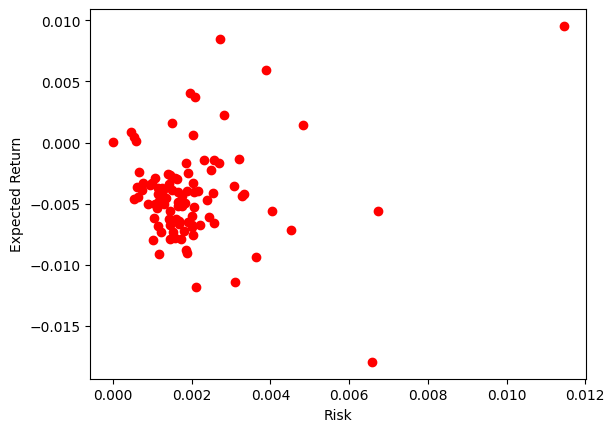

In [48]:
plt.plot(np.diag(sigma), mu, 'ro')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.savefig('risk_return.svg')

In [28]:
sigma.shape

(97, 97)

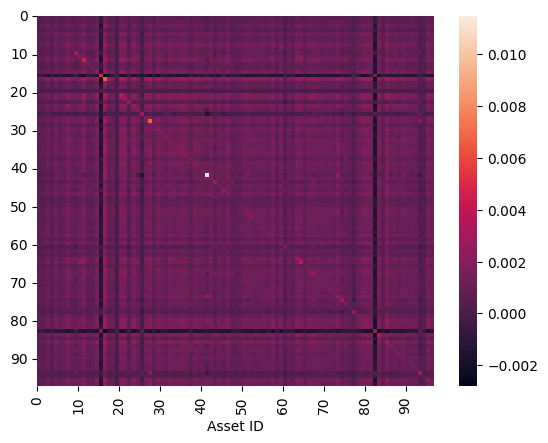

In [49]:
import seaborn as sns

ax = sns.heatmap(sigma)

ax.set_xticks(list(range(0, len(asset_list), 10)))
ax.set_xticklabels(f'{c:.0f}' for c in np.arange(0, 97, 10))
ax.set_xlabel('Asset ID')
ax.set_yticks(list(range(0, len(asset_list), 10)))
ax.set_yticklabels(f'{c:.0f}' for c in np.arange(0, 97, 10))
plt.savefig('covariance.svg')